# Этап 1. Получение данных

Изучим данные, предоставленные для проекта.

In [761]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Прочитаем файл games.csv и сохраним его в переменной df. 

In [762]:
# чтение файла с данными с сохранением в df
df = pd.read_csv('/datasets/games.csv')

Получение первых 10 строк таблицы.

In [763]:
# получение первых 10 строк таблицы.
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о данных таблицы df.

In [764]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию подробнее.

Всего в таблице 11 столбцов. Присутствуют два типа данных: non-null object (5 столбцов) и non-null float64 (6 столбцов).

Подробно разберём, какие в df столбцы и какую информацию они содержат:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.


**Выводы**

Каждая строка таблицы содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), год выпуска и присвоенный возрастной рейтинг.

Две проблемы, которые нужно решать на следующем этапе: пропуски и некачественные названия столбцов. 

Для проверки рабочих гипотез особенно ценны столбцы Genre, Platform, Year_of_Release и разбивка продаж по регионам. По ним мы сможем отследить, как менялись предпочтения пользователей со времением, составить портрет пользователя каждого региона. Столбцы Critic_Score, User_Score, Rating помогут проверить гипотезы о влиянии рейтинга игр на продажи в зависимости от жанра и платформы выхода игр.

# Этап 2. Предобработка данных

Заменим названия столбцов, преобразуем данные в нужные типы, обработаем пропуски (с заполнением, где возможно), проверим данные на наличие дубликатов, а также посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Получаем перечень названий столбцов.

In [765]:
# перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия столбцов с заглавной буквы, что не совсем удобно для доступа к данным. Переименуем столбцы для удобства дальнейшей работы. Проверим результат.

In [766]:
# переименование столбцов
df = df.rename(columns=lambda x: x.lower())

In [767]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.

In [768]:
# получение суммарного количества дубликатов в таблице df
df.duplicated().sum()

0

Дубликатов не обнаружено. Займемся пропущенными значениями.

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [769]:
# суммарное количество пропусков в таблице df
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Обработка пропусков данных в столбце 'name'**

Сперва посмотрим на строки с пропусками данных в столбце name.

In [770]:
# отбираем строки с пропусками данных в столбце name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких строк всего две. Более того данные строки содержат пропуски в других столбцах (genre, critic_score, user_score, rating) и относятся к играм 1993 года выпуска на платформе GEN. Таким образом, эти строки будем считать не релевантными и не способными существенно повлиять на результаты проводимого анализа, поэтому удалим данные строки.

In [771]:
# удаляем строки с пропусками данных в столбце name 
# делаем сброс индексов
df = df.dropna(subset=['name']).reset_index(drop=True)

In [772]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски данных в столбце name теперь отсутствуют

**Обработка пропусков данных в столбце 'year_of_release'**

Посмотрим на пропуски данных в столбце year_of_release 	

In [773]:
# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас нет данных о годе выпуска 269 игр.   
Заметим, что у части строк в названии игры присутствует год выпуска. Его можно использовать в качестве замены пропущенных данных для столбца year_of_release 

Произведем поиск таких строк и создадим словарь, где в качестве ключа будет индекс строки в которой год выпуска присутствует в самом названии игры, а в качестве значения будет сам год выпуска.

In [774]:
idx_year = {}  # создаем пустой словарь

# итерируемся по строкам с отсутствием информации о годе
for row in df[df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '):  # разделяем название игры на отдельные слова
        if item == row.name.split(' ')[-1]:  # берем последнее слово из списка
            try:  # если последнее слово является числом то
                if len(item) == 2 or len(item) == 4: # проверяем его "длину"
                    item = int(item)  # преобразовываем тип данных
                    if item < 21:  # приводим года этого века к полной дате
                        item += 2000
                    elif item > 80 and item < 100: # приводим года прошлого века к полной дате
                        item += 1900
                    if item >= 1980:  # 1980 -- минимальное значение года в наших данных
                        idx_year[row.Index] = item
            except:  # если последнее слово не является числом то продолжаем итерировать по строкам
                continue
            
            
# проверяем выводом на экран получившийся словарь
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 183   | year: 2004
index: 377   | year: 2004
index: 475   | year: 2006
index: 1300  | year: 1999
index: 1649  | year: 2003
index: 2478  | year: 2007
index: 2848  | year: 2011
index: 3412  | year: 2006
index: 3485  | year: 2002
index: 4204  | year: 2007
index: 4774  | year: 2003
index: 5155  | year: 2003
index: 5654  | year: 2005
index: 5888  | year: 2003
index: 8917  | year: 2005
index: 13194 | year: 2011
index: 13928 | year: 2006
index: 15951 | year: 2008
index: 16077 | year: 2007
index: 16371 | year: 2008


Производим замену отсутствующих значений на полученные из названий игр года.

In [775]:
# итерирумся по словарю и производим замену
for key, v in idx_year.items():
    df.loc[key, 'year_of_release'] = v

Проверим данные на замены, выполненные на предыдущем шаге.

In [776]:
# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь у нас нет данных о годе выпуска 249 игр. Это меньше, чем после предудущей проверки, значит замены были выполнены успешно.  
Найти года релиза игр для оставшихся 249 строк, возможно, получится с помощью парсинга страниц в интернете, но а данном этапе посчитаем возможным просто избавиться от этих строк и продолжить работу с имеющимся датасетом. т.к. 249 строк составляет всего порядка 1.49% от общего количества данных, что не должно в значительной степени сказаться на результатах исследования. Если же на каком-то этапе мы поймем, что данных нам будет не хватать, то мы вернемся к вопросу парсинга страниц в интернете для поиска недостающей информации.

In [777]:
# удаляем строки с пропусками данных в столбце year_of_release 
# делаем сброс индексов
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [778]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

Пропуски данных в столбце year_of_release теперь отсутствуют

**Обработка пропусков данных в столбце 'critic_score'**

Посмотрим на пропуски данных в столбце critic_score

In [779]:
# отбираем строки с пропусками данных в столбце critic_score
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас нет данных об оценке критиков для 8466 игр, что составляет порядка 51% игр.

Попробуем найти корреляцию в имеющихся данных между оценками критиков и:
* годом выхода игры (вдруг в какие-то года критики были более благосклонны?)
* платформой выхода игры (вдруг на какой-то из платформ выпускают только хиты, которые всегда понраву критикам)
* жанром игры (вдруг у критиков имеется любимый жанр?)
* продажами в Северной Америке (na_sales)
* продажами в Европе (eu_sales)
* продажами в Японии (jp_sales)
* продажами в остальных регионах (other_sales)
* общими продажами по всему миру (global_sales)

Находим коэффициент корреляции Пирсона (год выпуска игры VS оценка критиков)

In [780]:
df['year_of_release'].corr(df['critic_score'])

0.010353467558889768

Корреляция очень слабая. Практически полное ее отсутствие.

Чтобы найти корреляцию между платформой и оценкой критиков, зададим соответствие между названием платформы и числом, например, 'Wii': 1, 'NES': 2 и т.д.

In [781]:
# получаем уникальные названия платформ из датафрейма
plt_lst = df.platform.unique()

# создаем словарь соответствий названия платформы и числа
plt_code = {}
for i in range(len(plt_lst)):
    plt_code[plt_lst[i]] = i + 1
    
# проверяем получившийся словарь соответствий    
print(plt_code)

{'Wii': 1, 'NES': 2, 'GB': 3, 'DS': 4, 'X360': 5, 'PS3': 6, 'PS2': 7, 'SNES': 8, 'GBA': 9, 'PS4': 10, '3DS': 11, 'N64': 12, 'PS': 13, 'XB': 14, 'PC': 15, '2600': 16, 'PSP': 17, 'XOne': 18, 'WiiU': 19, 'GC': 20, 'GEN': 21, 'DC': 22, 'PSV': 23, 'SAT': 24, 'SCD': 25, 'WS': 26, 'NG': 27, 'TG16': 28, '3DO': 29, 'GG': 30, 'PCFX': 31}


Создадим новый столбец с числовым кодом платформы ('plt_code')

In [782]:
for row in df.itertuples():  # итерируемся по строкам датафрейма
    for k, v in plt_code.items():  # итерируемся по ключам и значениям словаря
        if row.platform == k:  # сопоставление названий платформы
            df.loc[row.Index, 'plt_code'] = v  # подстановка кода платформы в новый столбец

# вывод датафрейма с новым столбцом
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,6.0
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,5.0
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,23.0
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,9.0


Находим коэффициент корреляции Пирсона (название платформы VS оценка критиков)

In [783]:
df['plt_code'].corr(df['critic_score'])

0.1458551306699455

Корреляция очень слабая

Чтобы найти корреляцию между жанром и оценкой критиков, зададим соответствие между названием жанра и числом, например, 'Sports': 1, 'Platform': 2 и т.д.

In [784]:
# получаем уникальные названия жанров из датафрейма
genre_lst = df.genre.unique()

# создаем словарь соответствий названия жанра и числа
genre_code = {}
for i in range(len(genre_lst)):
    genre_code[genre_lst[i]] = i + 1
    
# проверяем получившийся словарь соответствий    
print(genre_code)

{'Sports': 1, 'Platform': 2, 'Racing': 3, 'Role-Playing': 4, 'Puzzle': 5, 'Misc': 6, 'Shooter': 7, 'Simulation': 8, 'Action': 9, 'Fighting': 10, 'Adventure': 11, 'Strategy': 12}


In [785]:
for row in df.itertuples():  # итерируемся по строкам датафрейма
    for k, v in genre_code.items():  # итерируемся по ключам и значениям словаря
        if row.genre == k:  # сопоставление названий жанра
            df.loc[row.Index, 'genre_code'] = v  # подстановка кода жанра в новый столбец

# вывод датафрейма с новым столбцом
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1.0,1.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2.0,2.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0,3.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1.0,1.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,6.0,9.0
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,5.0,1.0
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,23.0,11.0
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,9.0,2.0


Находим коэффициент корреляции Пирсона (название жанра VS оценка критиков)

In [786]:
df['genre_code'].corr(df['critic_score'])

-0.08257775097358992

Отрицательная очень слабая корреляция

Подсчитаем общие продажи для каждой из игр по всему миру (создадим новый столбец global_sales)

In [787]:
# суммируем продажи по регионам в новый столбец global_sales
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1.0,1.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2.0,2.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0,3.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1.0,1.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3.0,4.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,6.0,9.0,0.01
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,5.0,1.0,0.01
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,23.0,11.0,0.01
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,9.0,2.0,0.01


Находим коэффициент корреляции Пирсона (продажи в Северной Америке VS оценка критиков)

In [788]:
df['na_sales'].corr(df['critic_score'])

0.24081751449345798

Корреляция слабая

Находим коэффициент корреляции Пирсона (продажи в Европе VS оценка критиков)

In [789]:
df['eu_sales'].corr(df['critic_score'])

0.22133464515023293

Корреляция слабая

Находим коэффициент корреляции Пирсона (продажи в Японии VS оценка критиков)


In [790]:
df['jp_sales'].corr(df['critic_score'])

0.15319263872334984

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в остальных регионах VS оценка критиков)


In [791]:
df['other_sales'].corr(df['critic_score'])

0.19891456778301803

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (общие продажи во всем мире VS оценка критиков)

In [792]:
df['global_sales'].corr(df['critic_score'])

0.2458435644758743

Корреляция слабая

Во всех рассмотренных случаях мы получили либо очень слабую, либо просто слабую корреляцию между рассмотренными признаками и оценкой критиков:
* минимальная 'год выпуска игры VS оценка критиков': 0.010..
* максимальная 'общие продажи во всем мире VS оценка критиков': 0.245..

Поэтому осреднять оценки критиков просто по одному из этих критериев для заполнения пропусков данных не представляется уместным. Попробуем оценить средние значения с помощью группировок по нескольким признакам.

Заполним отсутствующие значения critic_score средними значениями оценок после группировки платформа-год_релиза-жанр. Таким образом, мы дадим более точную среднюю оценку, чем если бы мы использовали просто среднее значение по всему датасету или по отдельному из признаков.

In [793]:
# проводим группировку и считаем среднее по строкам с наличием значений
avg_cr_score = df.dropna(subset=['critic_score']) \
    .groupby(['platform', 'year_of_release', 'genre'], as_index=False) \
    .agg({'critic_score': 'mean'})

avg_cr_score

,platform,year_of_release,genre,critic_score
0,3DS,2011.0,Action,57.833333
1,3DS,2011.0,Adventure,58.333333
2,3DS,2011.0,Fighting,71.400000
3,3DS,2011.0,Misc,62.250000
4,3DS,2011.0,Platform,69.833333
...,...,...,...,...
1132,XOne,2016.0,Role-Playing,79.333333
1133,XOne,2016.0,Shooter,77.000000
1134,XOne,2016.0,Simulation,59.000000
1135,XOne,2016.0,Sports,81.500000


Создадим список кортежей со следующими значениями: платформа-год_релиза-жанр-средняя_оценка

In [794]:
# создание списков по колонкам датафрейма
avg_cr_score_platform = avg_cr_score.platform.to_list()
avg_cr_score_year = avg_cr_score.year_of_release.to_list()
avg_cr_score_genre = avg_cr_score.genre.to_list()
avg_cr_score_score = avg_cr_score.critic_score.to_list()

# создание списка кортежей
avg_cr_score_lst = list(zip(avg_cr_score_platform,
                           avg_cr_score_year,
                           avg_cr_score_genre,
                           avg_cr_score_score))

# проверка получившегося результата выводом
print(*avg_cr_score_lst, sep='\n')

('3DS', 2011.0, 'Action', 57.833333333333336)
('3DS', 2011.0, 'Adventure', 58.333333333333336)
('3DS', 2011.0, 'Fighting', 71.4)
('3DS', 2011.0, 'Misc', 62.25)
('3DS', 2011.0, 'Platform', 69.83333333333333)
('3DS', 2011.0, 'Puzzle', 60.4)
('3DS', 2011.0, 'Racing', 62.0)
('3DS', 2011.0, 'Role-Playing', 72.66666666666667)
('3DS', 2011.0, 'Shooter', 78.0)
('3DS', 2011.0, 'Simulation', 62.5)
('3DS', 2011.0, 'Sports', 57.8)
('3DS', 2011.0, 'Strategy', 60.5)
('3DS', 2012.0, 'Action', 71.92307692307692)
('3DS', 2012.0, 'Adventure', 71.0)
('3DS', 2012.0, 'Fighting', 64.0)
('3DS', 2012.0, 'Misc', 78.0)
('3DS', 2012.0, 'Platform', 72.75)
('3DS', 2012.0, 'Puzzle', 75.0)
('3DS', 2012.0, 'Role-Playing', 73.71428571428571)
('3DS', 2012.0, 'Simulation', 82.0)
('3DS', 2012.0, 'Sports', 69.0)
('3DS', 2013.0, 'Action', 64.875)
('3DS', 2013.0, 'Adventure', 68.0)
('3DS', 2013.0, 'Misc', 57.0)
('3DS', 2013.0, 'Platform', 67.0)
('3DS', 2013.0, 'Puzzle', 74.5)
('3DS', 2013.0, 'Role-Playing', 68.0)
('3DS', 20

Проитерируемся по строкам датафрейма и сопоставив значения троек платформа-год_релиза-жанр добавим посчитанную среднюю оценку в столбец critic_score с отсутствующими данными.

In [795]:
for row in df[df['critic_score'].isna()].itertuples():  # итерируемся по строкам датафрейма
    for tup in avg_cr_score_lst:  # итерируемся по кортежам списка
        if (row.platform == tup[0] and row.year_of_release == tup[1]) and row.genre == tup[2]:  # сопоставление значений в тройках
            df.loc[row.Index, 'critic_score'] = tup[3]  # замена NaN на посчитанное средне

Оценим количество пропусков в данных по столбцу critic_score, после замен, выполненных на предыдущем шаге.

In [796]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2.0,2.0,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3.0,4.0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,3.0,5.0,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,2.0,7.0,28.31
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,3.0,4.0,23.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16440,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,6.0,9.0,0.01
16442,PGA European Tour,N64,2000.0,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,12.0,1.0,0.01
16443,Carmageddon 64,N64,1999.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN,12.0,9.0,0.01
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,6.0,9.0,0.01


Видно, что количество пропусков сократилось с 8466 до 2213. Продолжим производить замены подобным образом, с группировкой по двойкам значений признаков.

Сначала проделаем схожие операции с группировкой по паре платформа-жанр.

In [797]:
# проводим группировку и считаем среднее по строкам с наличием значений
avg_cr_score_pg = df.dropna(subset=['critic_score']) \
    .groupby(['platform', 'genre'], as_index=False) \
    .agg({'critic_score': 'mean'})

avg_cr_score_pg

,platform,genre,critic_score
0,3DS,Action,63.672539
1,3DS,Adventure,70.252525
2,3DS,Fighting,67.444444
3,3DS,Misc,69.125000
4,3DS,Platform,72.517857
...,...,...,...
192,XOne,Role-Playing,81.005952
193,XOne,Shooter,77.552632
194,XOne,Simulation,59.000000
195,XOne,Sports,71.473684


In [798]:
# создание списков по колонкам датафрейма
avg_cr_score_platform_pg = avg_cr_score_pg.platform.to_list()
avg_cr_score_genre_pg = avg_cr_score_pg.genre.to_list()
avg_cr_score_score_pg = avg_cr_score_pg.critic_score.to_list()

# создание списка кортежей
avg_cr_score_pg_lst = list(zip(avg_cr_score_platform_pg,
                           avg_cr_score_genre_pg,
                           avg_cr_score_score_pg))

# проверка получившегося результата выводом
print(*avg_cr_score_pg_lst, sep='\n')

('3DS', 'Action', 63.672538735774076)
('3DS', 'Adventure', 70.25252525252526)
('3DS', 'Fighting', 67.44444444444444)
('3DS', 'Misc', 69.125)
('3DS', 'Platform', 72.51785714285714)
('3DS', 'Puzzle', 67.75294117647059)
('3DS', 'Racing', 62.0)
('3DS', 'Role-Playing', 71.75719759168037)
('3DS', 'Shooter', 78.0)
('3DS', 'Simulation', 69.5952380952381)
('3DS', 'Sports', 63.780952380952364)
('3DS', 'Strategy', 64.75)
('DC', 'Adventure', 88.0)
('DC', 'Fighting', 86.75)
('DC', 'Platform', 89.0)
('DC', 'Racing', 83.33333333333333)
('DC', 'Role-Playing', 88.0)
('DC', 'Shooter', 83.0)
('DC', 'Simulation', 82.0)
('DC', 'Sports', 97.0)
('DS', 'Action', 58.11168411214868)
('DS', 'Adventure', 61.697470238095235)
('DS', 'Fighting', 63.083333333333336)
('DS', 'Misc', 64.49956709956696)
('DS', 'Platform', 68.55338266384778)
('DS', 'Puzzle', 68.03007905138338)
('DS', 'Racing', 58.389417989417986)
('DS', 'Role-Playing', 69.40265070313835)
('DS', 'Shooter', 66.80320512820512)
('DS', 'Simulation', 63.1969933

In [799]:
for row in df[df['critic_score'].isna()].itertuples():  # итерируемся по строкам датафрейма
    for tup in avg_cr_score_pg_lst:  # итерируемся по кортежам списка
        if row.platform == tup[0] and row.genre == tup[1]:  # сопоставление значений в двойках
            df.loc[row.Index, 'critic_score'] = tup[2]  # замена NaN на посчитанное средне

Оценим количество пропусков в данных по столбцу critic_score, после замен, выполненных на предыдущем шаге.

In [800]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2.0,2.0,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3.0,4.0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,3.0,5.0,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,2.0,7.0,28.31
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,3.0,4.0,23.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15965,Rock N' Roll Racing,SNES,1993.0,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,8.0,3.0,0.01
16302,Farming Simulator 2014,PSV,2014.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN,23.0,8.0,0.01
16442,PGA European Tour,N64,2000.0,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,12.0,1.0,0.01
16443,Carmageddon 64,N64,1999.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN,12.0,9.0,0.01


Видно, что общее количество пропусков теперь сократилось с 8466 до 1111 (с 2213 до 1111 в сравнении с предыдущим шагом). Продолжим производить замены подобным образом, с группировкой по двойкам значений признаков.

Теперь проделаем схожие операции с группировкой по паре год-жанр.

In [801]:
# проводим группировку и считаем среднее по строкам с наличием значений
avg_cr_score_yg = df.dropna(subset=['critic_score']) \
    .groupby(['year_of_release', 'genre'], as_index=False) \
    .agg({'critic_score': 'mean'})

avg_cr_score_yg

,year_of_release,genre,critic_score
0,1985.0,Action,58.111684
1,1985.0,Simulation,59.000000
2,1988.0,Simulation,64.000000
3,1992.0,Adventure,71.536667
4,1992.0,Shooter,85.000000
...,...,...,...
275,2016.0,Role-Playing,74.616235
276,2016.0,Shooter,75.683058
277,2016.0,Simulation,65.911765
278,2016.0,Sports,74.126057


In [802]:
# создание списков по колонкам датафрейма
avg_cr_score_year_yg = avg_cr_score_yg.year_of_release.to_list()
avg_cr_score_genre_yg = avg_cr_score_yg.genre.to_list()
avg_cr_score_score_yg = avg_cr_score_yg.critic_score.to_list()

# создание списка кортежей
avg_cr_score_yg_lst = list(zip(avg_cr_score_year_yg,
                           avg_cr_score_genre_yg,
                           avg_cr_score_score_yg))

# проверка получившегося результата выводом
print(*avg_cr_score_yg_lst, sep='\n')

(1985.0, 'Action', 58.11168411214868)
(1985.0, 'Simulation', 59.0)
(1988.0, 'Simulation', 64.0)
(1992.0, 'Adventure', 71.53666666666668)
(1992.0, 'Shooter', 85.0)
(1992.0, 'Simulation', 72.48693502824858)
(1992.0, 'Strategy', 75.57156136903797)
(1994.0, 'Adventure', 62.48784552845529)
(1994.0, 'Fighting', 71.44444444444444)
(1994.0, 'Misc', 69.25)
(1994.0, 'Racing', 82.36531986531985)
(1994.0, 'Role-Playing', 79.88185185185189)
(1994.0, 'Shooter', 73.71221190686707)
(1994.0, 'Simulation', 81.27777777777777)
(1994.0, 'Sports', 79.59230769230771)
(1994.0, 'Strategy', 69.05363782737612)
(1995.0, 'Action', 75.52281052281053)
(1995.0, 'Adventure', 53.4390243902439)
(1995.0, 'Fighting', 73.45104166666668)
(1995.0, 'Misc', 74.91086956521738)
(1995.0, 'Platform', 80.98958333333333)
(1995.0, 'Puzzle', 79.92307692307692)
(1995.0, 'Racing', 82.36531986531985)
(1995.0, 'Role-Playing', 79.88185185185189)
(1995.0, 'Shooter', 72.33333333333333)
(1995.0, 'Simulation', 81.27777777777777)
(1995.0, 'Spor

In [803]:
for row in df[df['critic_score'].isna()].itertuples():  # итерируемся по строкам датафрейма
    for tup in avg_cr_score_yg_lst:  # итерируемся по кортежам списка
        if row.year_of_release == tup[0] and row.genre == tup[1]:  # сопоставление значений в двойках
            df.loc[row.Index, 'critic_score'] = tup[2]  # замена NaN на посчитанное средне

Оценим количество пропусков в данных по столбцу critic_score, после замен, выполненных на предыдущем шаге.

In [804]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2.0,2.0,40.24
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,3.0,5.0,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,2.0,7.0,28.31
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,8.0,2.0,20.62
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,3.0,2.0,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13928,Castlevania Bloodlines,GEN,1994.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN,21.0,2.0,0.04
14518,Kidou Senshi V Gundam,SNES,1994.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,8.0,9.0,0.03
14754,The Great Battle Gaiden 2: Matsuri da Wasshoi,SNES,1994.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,8.0,9.0,0.03
14854,Bust-A-Move,3DO,1994.0,Puzzle,0.00,0.00,0.02,0.00,NaN,NaN,NaN,29.0,5.0,0.02


Видно, что общее количество пропусков теперь сократилось с 8466 до 368 (с 1111 до 368 в сравнении с предыдущим шагом). Продолжим производить замены подобным образом, с группировкой по двойкам значений признаков.

Проделаем схожие операции с группировкой по паре платформа-год.

In [805]:
# проводим группировку и считаем среднее по строкам с наличием значений
avg_cr_score_py = df.dropna(subset=['critic_score']) \
    .groupby(['platform', 'year_of_release'], as_index=False) \
    .agg({'critic_score': 'mean'})

avg_cr_score_py

,platform,year_of_release,critic_score
0,3DO,1995.0,67.358401
1,3DS,2011.0,62.508190
2,3DS,2012.0,73.151247
3,3DS,2013.0,65.558604
4,3DS,2014.0,65.809971
...,...,...,...
198,XB,2008.0,76.867165
199,XOne,2013.0,65.684211
200,XOne,2014.0,74.600729
201,XOne,2015.0,73.505625


In [806]:
# создание списков по колонкам датафрейма
avg_cr_score_platform_py = avg_cr_score_py.platform.to_list()
avg_cr_score_year_py = avg_cr_score_py.year_of_release.to_list()
avg_cr_score_score_py = avg_cr_score_py.critic_score.to_list()

# создание списка кортежей
avg_cr_score_py_lst = list(zip(avg_cr_score_platform_py,
                           avg_cr_score_year_py,
                           avg_cr_score_score_py))

# проверка получившегося результата выводом
print(*avg_cr_score_py_lst, sep='\n')

('3DO', 1995.0, 67.35840108401084)
('3DS', 2011.0, 62.508189655172394)
('3DS', 2012.0, 73.15124660285956)
('3DS', 2013.0, 65.55860369788942)
('3DS', 2014.0, 65.80997140522877)
('3DS', 2015.0, 68.89059364408196)
('3DS', 2016.0, 71.18072808833679)
('DC', 1998.0, 85.80124695241507)
('DC', 1999.0, 92.9047619047619)
('DC', 2000.0, 86.184375)
('DC', 2001.0, 83.23244205089443)
('DC', 2002.0, 88.0)
('DC', 2007.0, 83.0)
('DC', 2008.0, 88.0)
('DS', 1985.0, 58.11168411214868)
('DS', 2004.0, 60.83370288795531)
('DS', 2005.0, 62.72543656908065)
('DS', 2006.0, 63.81755077426724)
('DS', 2007.0, 62.43865053386339)
('DS', 2008.0, 63.008777847269855)
('DS', 2009.0, 62.88391906336368)
('DS', 2010.0, 68.12955236274075)
('DS', 2011.0, 64.7691735701434)
('DS', 2012.0, 62.56574389116721)
('DS', 2013.0, 63.283694567897015)
('GB', 1992.0, 71.53666666666668)
('GB', 1995.0, 78.93665168617613)
('GB', 1996.0, 81.5475390270803)
('GB', 1997.0, 80.1165514249514)
('GB', 1998.0, 75.8111111111111)
('GB', 1999.0, 75.8451

In [807]:
for row in df[df['critic_score'].isna()].itertuples():  # итерируемся по строкам датафрейма
    for tup in avg_cr_score_py_lst:  # итерируемся по кортежам списка
        if row.platform == tup[0] and row.year_of_release == tup[1]:  # сопоставление значений в двойках
            df.loc[row.Index, 'critic_score'] = tup[2]  # замена NaN на посчитанное средне

Оценим количество пропусков в данных по столбцу critic_score, после замен, выполненных на предыдущем шаге.

In [808]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,3.0,5.0,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,2.0,7.0,28.31
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,8.0,2.0,20.62
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,3.0,2.0,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,2.0,2.0,17.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12997,Keiba Eight Special,SNES,1993.0,Sports,0.00,0.00,0.05,0.00,NaN,NaN,NaN,8.0,1.0,0.05
13149,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN,21.0,4.0,0.05
13376,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN,30.0,2.0,0.04
14854,Bust-A-Move,3DO,1994.0,Puzzle,0.00,0.00,0.02,0.00,NaN,NaN,NaN,29.0,5.0,0.02


Общее количество пропусков теперь сократилось с 8466 до 316 (с 368 до 316 в сравнении с предыдущим шагом). Продолжим производить замены подобным образом, с группировкой по платформе.

In [809]:
# проводим группировку и считаем среднее по строкам с наличием значений
avg1 = df.dropna(subset=['critic_score']) \
    .groupby(['platform'], as_index=False) \
    .agg({'critic_score': 'mean'}) 

avg1

,platform,critic_score
0,3DO,67.358401
1,3DS,67.350686
2,DC,87.496585
3,DS,63.821633
4,GB,75.140604
5,GBA,66.564459
6,GC,69.234431
7,GEN,77.210488
8,N64,77.996491
9,NES,59.925865


In [810]:
# создание списков по колонкам датафрейма
avg_cr_score_plt = avg1.platform.to_list()
avg_cr_score_scr = avg1.critic_score.to_list()

# создание списка кортежей
avg_cr_score_plt_lst = list(zip(avg_cr_score_plt,
                           avg_cr_score_scr))

# проверка получившегося результата выводом
print(*avg_cr_score_plt_lst, sep='\n')

('3DO', 67.35840108401084)
('3DS', 67.35068579774753)
('DC', 87.49658522578322)
('DS', 63.82163344426161)
('GB', 75.14060440086554)
('GBA', 66.56445928361761)
('GC', 69.23443123021852)
('GEN', 77.21048843132178)
('N64', 77.99649075695531)
('NES', 59.92586475712394)
('NG', 76.37232104700857)
('PC', 75.69223611845293)
('PCFX', 81.0583641975309)
('PS', 75.75536082040884)
('PS2', 68.03368356612894)
('PS3', 70.33116715930251)
('PS4', 72.17101386790064)
('PSP', 67.01381145110685)
('PSV', 71.20566704256576)
('SAT', 74.24225081093488)
('SCD', 73.96016190890957)
('SNES', 78.13178792056455)
('TG16', 62.886178861788615)
('WS', 77.09727454160804)
('Wii', 63.357496371738875)
('WiiU', 71.06359238644951)
('X360', 68.23598363610684)
('XB', 69.78720086081907)
('XOne', 73.2852483773536)


In [811]:
for row in df[df['critic_score'].isna()].itertuples():  # итерируемся по строкам датафрейма
    for tup in avg_cr_score_plt_lst:  # итерируемся по кортежам списка
        if row.platform == tup[0]:  # сопоставление названий платформы
            df.loc[row.Index, 'critic_score'] = tup[1]  # замена NaN на посчитанное средне

Оценим количество пропусков в данных по столбцу critic_score, после замен, выполненных на предыдущем шаге.

In [812]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN,16.0,5.0,7.81
240,Pitfall!,2600,1981.0,Platform,4.21,0.24,0.00,0.05,NaN,NaN,NaN,16.0,2.0,4.50
262,Asteroids,2600,1980.0,Shooter,4.00,0.26,0.00,0.05,NaN,NaN,NaN,16.0,7.0,4.31
545,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.00,0.03,NaN,NaN,NaN,16.0,7.0,2.76
729,Frogger,2600,1981.0,Action,2.06,0.12,0.00,0.02,NaN,NaN,NaN,16.0,9.0,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,Krull,2600,1982.0,Action,0.13,0.01,0.00,0.00,NaN,NaN,NaN,16.0,9.0,0.14
9354,RealSports Volleyball,2600,1981.0,Sports,0.12,0.01,0.00,0.00,NaN,NaN,NaN,16.0,1.0,0.13
11581,Super Football,2600,1987.0,Sports,0.07,0.00,0.00,0.00,NaN,NaN,NaN,16.0,1.0,0.07
11611,Super Baseball,2600,1987.0,Sports,0.07,0.00,0.00,0.00,NaN,NaN,NaN,16.0,1.0,0.07


Общее количество пропусков теперь сократилось с 8466 до 117 (с 316 до 117 в сравнении с предыдущим шагом). Посмотрим на года выпуска игр у которых по прежнему не удается оценить оценку критиков.

In [813]:
# просмотр статистики по столбцу year_of_release
df[df['critic_score'].isna()]['year_of_release'].describe()

count     117.000000
mean     1982.222222
std         2.181865
min      1980.000000
25%      1981.000000
50%      1982.000000
75%      1982.000000
max      1992.000000
Name: year_of_release, dtype: float64

Из статистики видно что нам не удается получить оценку критиков для игр выпуска 1980-1992 годов.

Посмотрим на распределение количества игр по годам.

In [814]:
# просмотр распределения игр (с отсутствующим рейтингом критико на данном этапе) по столбцу year_of_release
df[df['critic_score'].isna()]['year_of_release'].value_counts()

1981.0    46
1982.0    36
1983.0    11
1980.0     9
1987.0     6
1986.0     2
1989.0     2
1988.0     2
1985.0     1
1992.0     1
1984.0     1
Name: year_of_release, dtype: int64

Преимущественно это игры 1981-1983 годов выпуска. Игровая индустрия только зарождалась и не все игры получали оценки критиков. Данные начала восьмидесятых годов не окажут существенного влияния на ход нашего анализа, к тому же неизвестные нам 117 строк составляют менее 1% процента от общего количества строк, поэтому оставшиеся строки с пропусками данных в столбце critic_score удалим.

In [815]:
# удаляем строки с пропусками данных в столбце critic_score
# делаем сброс индексов
df = df.dropna(subset=['critic_score']).reset_index(drop=True)

In [816]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6493
rating             6565
plt_code              0
genre_code            0
global_sales          0
dtype: int64

Пропуски данных в столбце critic_score теперь отсутствуют.

**Обработка пропусков данных в столбце 'user_score'**

Теперь рассмотрим пропуски данных в столбце user_score аналогичным образом, как и critic_score.

Сперва посмотрим на значения в столбце user_score.

In [817]:
df.user_score.value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
0.9       2
0.5       2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Наиболее часто встречающееся значение это не численная оценка пользователя, а строка 'tbd', означающая 'еще не определена' (от английского to be defined). В данной ситуации можно воспользоваться свойством среднего: если в датасет добавить число равное среднему, то новое среднее датасета не изменится, таким образом, мы можем сначала заменить tbd на среднее точно так же, как и случаи отсутствия значений NaN.

In [818]:
# производим замену 'tbd' на NaN
df = df.replace('tbd', np.nan)

In [819]:
# проверяем успешность замены суммарным количеством пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         8871
rating             6565
plt_code              0
genre_code            0
global_sales          0
dtype: int64

Изменим тип данных 'user_score' со строки на числа с плавающей точкой

In [820]:
df['user_score'] = df.user_score.astype('float')

Проверяем успешность смены типа данных 'user_score'

In [821]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
plt_code           float64
genre_code         float64
global_sales       float64
dtype: object

Тип данных был заменен с object на float64. Теперь мы можем проводить математические операции с данными столбца user_score.

Находим коэффициент корреляции Пирсона (год выпуска игры VS оценка пользователей)

In [822]:
df['year_of_release'].corr(df['user_score'])

-0.26826355995896833

Имеем слабую отрицательную корреляцию.

Чтобы найти корреляцию между платформой и оценкой пользователей воспользуемся полученным на ранее столбцом plt_code. Находим коэффициент корреляции Пирсона (название платформы VS оценка пользователей).

In [823]:
df['plt_code'].corr(df['user_score'])

0.100459339408555

Корреляция очень слабая

Чтобы найти корреляцию между жанром и оценкой пользователей воспользуемся полученным на ранее столбцом genre_code. Находим коэффициент корреляции Пирсона (название жанра VS оценка пользователей). 

In [824]:
df['genre_code'].corr(df['user_score'])

0.005559880838069672

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в Северной Америке VS оценка пользователей)

In [825]:
df['na_sales'].corr(df['user_score'])

0.08570745189151244

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в Европе VS оценка пользователей)

In [826]:
df['eu_sales'].corr(df['user_score'])

0.05526729130424239

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в Японии VS оценка пользователей)


In [827]:
df['jp_sales'].corr(df['user_score'])

0.12617410277268779

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в остальных регионах VS оценка пользователей)


In [828]:
df['other_sales'].corr(df['user_score'])

0.057011543401208904

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (общие продажи во всем мире VS оценка пользователей)

In [829]:
df['global_sales'].corr(df['user_score'])

0.08797432650715238

Корреляция очень слабая

Найдем коэффициент корреляции Пирсона (оценки критиков VS оценка пользователей)

In [830]:
df['critic_score'].corr(df['user_score'])

0.5422227512948222

Корреляция средняя

Посмотрим на распределения оценок пользователей и оценок критиков и их зависимости.

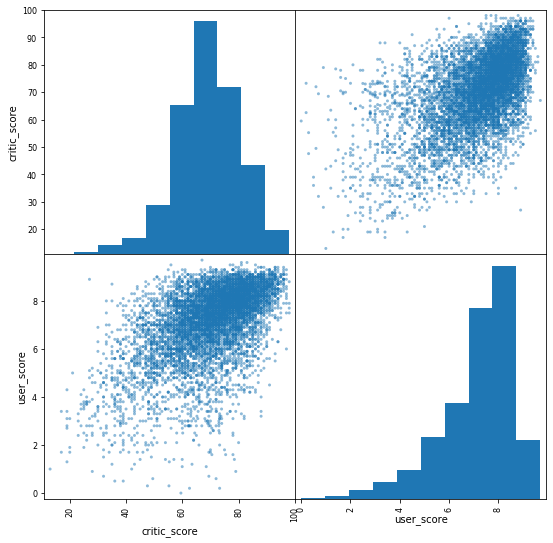

In [831]:
pd.plotting.scatter_matrix(df[['critic_score', 'user_score']], figsize=(9,9));

Распределения близкие к нормальному. Корреляция средне выраженная. Таким образом, предлагается использовать critic_score для получения пропущенных значений user_score.

Отберем во временный датафрейм срез со столбцами, содержащими значения оценок пользователей. Затем скопируем полученный срез в датафрейм в котором мы посчитаем разницу между оценкой критиков и оценкой пользователей, осредним полученный результат и таким образом получим поправочный коэффициент delta, который в дальнейшем будет использован при получении пропусков значений оценок пользователей по формуле:
> user_score = critic_score / 10 + delta

In [832]:
# отбираем срез с имеющимися значениями столбца user_score
df_temp = df[df['user_score'].notna()]

# делаем копию среза в отдельный датафрейм
df_delta = df_temp.copy(deep=True)

# cчитаем разницу между оценками критиков и оценками пользователей
df_delta['delta'] = df_delta['critic_score'] / 10 - df_delta['user_score']

# находим поправочный коэффициент (среднее всех разниц оценок)
delta = df_delta.delta.mean()

Вычесляем пропуски значений оценок пользователей по формуле:
> user_score = critic_score / 10 + delta


In [833]:
# проводим вычисление с заменой значений NaN на результат вычислений
df.loc[df['user_score'].isna(), 'user_score'] = df.loc[df['user_score'].isna(), 'critic_score'] / 10 + delta

# отображение полученного результата
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,1.0,1.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,58.111684,5.691517,NaN,2.0,2.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,1.0,3.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,1.0,1.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,81.058364,7.986185,NaN,3.0,4.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.735887,6.753938,NaN,6.0,9.0,0.01
16343,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,70.619048,6.942254,NaN,5.0,1.0,0.01
16344,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,75.000000,7.380349,NaN,23.0,11.0,0.01
16345,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,62.909091,6.171258,NaN,9.0,2.0,0.01


Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [834]:
# суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6565
plt_code              0
genre_code            0
global_sales          0
dtype: int64

Пропуски значений в столбце user_score теперь отсутствуют. Осталось проработать замены пропусков значений в столбце rating.

**Обработка пропусков данных в столбце 'rating'**

Так как rating является номинативной переменной, наиболее разумным будет заменить пропущеные значения на 'unknown'

In [835]:
# замена пропущенных значений в столбце 'rating' на строку 'unknown' специальным методом замены
df['rating'] = df['rating'].fillna('unknown')

In [836]:
# <проверка: вычисление суммарного количества пропусков, выявленных в таблице df>
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
plt_code           0
genre_code         0
global_sales       0
dtype: int64

Пропуски значений во всех столбцах отсутствуют. После удаления вспомогательных столбцов, полученных на этом этапе и написания кратких выводов можно переходить к следующему этапу.

Удалим вспомогательные столбцы, которые нам больше не понадобятся. Сделаем это для экономии памяти.

In [837]:
# удаление вспомогательных столбцов, которые больше не понадобятся
df.drop(['plt_code', 'genre_code'], axis=1, inplace=True)

Проверка последних преобразований датафрейма

In [838]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16347 entries, 0 to 16346
Data columns (total 12 columns):
name               16347 non-null object
platform           16347 non-null object
year_of_release    16347 non-null float64
genre              16347 non-null object
na_sales           16347 non-null float64
eu_sales           16347 non-null float64
jp_sales           16347 non-null float64
other_sales        16347 non-null float64
critic_score       16347 non-null float64
user_score         16347 non-null float64
rating             16347 non-null object
global_sales       16347 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Преобразования были выполнены успешно.

**Выводы**

На данном этапе были проведеы замены названия столбцов на более удобные для дальнейшей работы, а также проведена обширная работа по поиску и замене пропущенных значений.

Нам встретились пропущенные значения в столбцах name, year_of_release, critic_score, user_score и rating. 

В столбце name было всего два пропуска, что не является критичным и может быть вызвано случайностью.  

В столбце year_of_release количество пропусков также не было существено, часть значений удалось восстановить, взяв информацию из самого названия игр, остальные данные были опущены, из-за их малого количества и не возможности повлиять на исследование в целом.  

Пропуски значений critic_score составляли порядка половины данных. Critic_score были исследованы на корреляцию с имеющимися столбцами. Четких корреляций выявить не удалось, поэтому critic_score были восстановлены по средним оценкам после группировок по трем или двум признакам. 

Пропуски значений user_score составляли порядка трети данных, имели среднюю корреляцию с оценками критиков и поэтому были восстановлены на основе оценок критиков с добавлением усредняющего коэффициента для увеличения последующей взаимной корреляции.

Пропуски значений рейтинга игр были заменены на строку 'unknown', т.к. это номинативная переменная и не представляется возможным произвести оценку ее действительных значений для той или иной игры.

Заметная часть отсутствующих оценок и рейтингов была связана с годом релиза игры. Либо это 1980-ый годы, когда индустрия видео-игр не была столь развита, поэтому пропуски оценок и рейтингов кажутся логичными, либо это наиболее новые игры, которые еще не успели агрегировать оценки критиков и пользователей (включая, более 2000 строковых значений 'tbc').  

Так же были посчитаны суммарные продажи во всех регионах с последующим их сохранением в отдельный столбец 'global_sales'.


# Этап 3. Исследовательский анализ данных

Рассмотрим распределение игр по годам выпуска, оценим популярность игровых платформ в те или иные периоды времени, отберем актуальные данные для дальнейшей работы, построения прогнозов и выводов.

**Распределение игр по годам выпуска**

Посмотрим, сколько игр выпускалось в разные годы.

In [843]:
# группировка данных и подсчет количества выпущенных игр по годам
games_per_year = df.groupby('year_of_release', as_index=False).name \
                   .count() \
                   .rename(columns={'name': 'games_number'})

Построим столбчатую диаграму распределения количества выпущенных игр по годам.

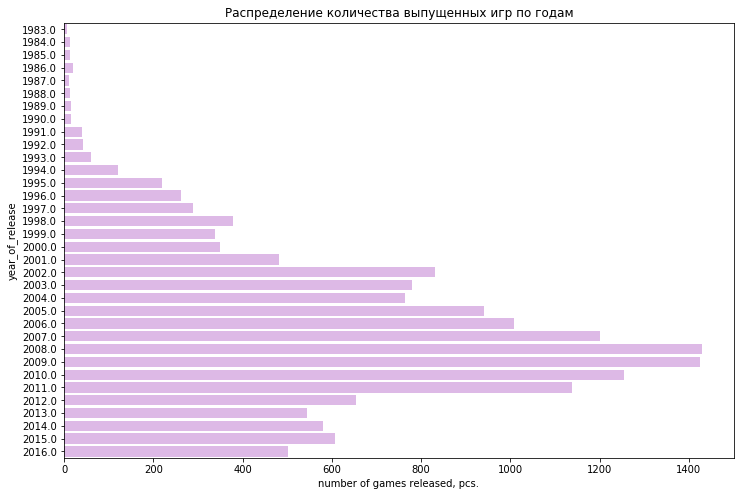

In [840]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_per_year.year_of_release,
                 x=games_per_year.games_number,
                 orient='h',
                 color='#e2b2ed'
                 );

# подписи осей и названия
plt.xlabel('number of games released, pcs.')
plt.title('Распределение количества выпущенных игр по годам');

По графику видно, что основной объем игр был выпущен в первое десятилетие двадцать первого века с пиком в 2008-2009 годах. После 2011 года наблюдается значительный спад количества выпущенных игр (рост популярности социальных сетей?).

Оценим накопительный процент количества вышедших игр

In [841]:
# подсчитываем процентное соотношение для конкретного года
games_per_year['prcnt'] = 100 * games_per_year.games_number / games_per_year.games_number.sum()
# подсчитываем накопительный процент
games_per_year['prcnt_sum'] = games_per_year.prcnt.expanding(1).sum()

# визуализация результатов
games_per_year

,year_of_release,games_number,prcnt,prcnt_sum
0,1983.0,6,0.036704,0.036704
1,1984.0,13,0.079525,0.116229
2,1985.0,13,0.079525,0.195755
3,1986.0,19,0.116229,0.311984
4,1987.0,10,0.061173,0.373157
5,1988.0,13,0.079525,0.452682
6,1989.0,15,0.091760,0.544442
7,1990.0,16,0.097877,0.642320
8,1991.0,41,0.250811,0.893130
9,1992.0,42,0.256928,1.150058


Построение накопительой диаграммы процента выпущенных игр.

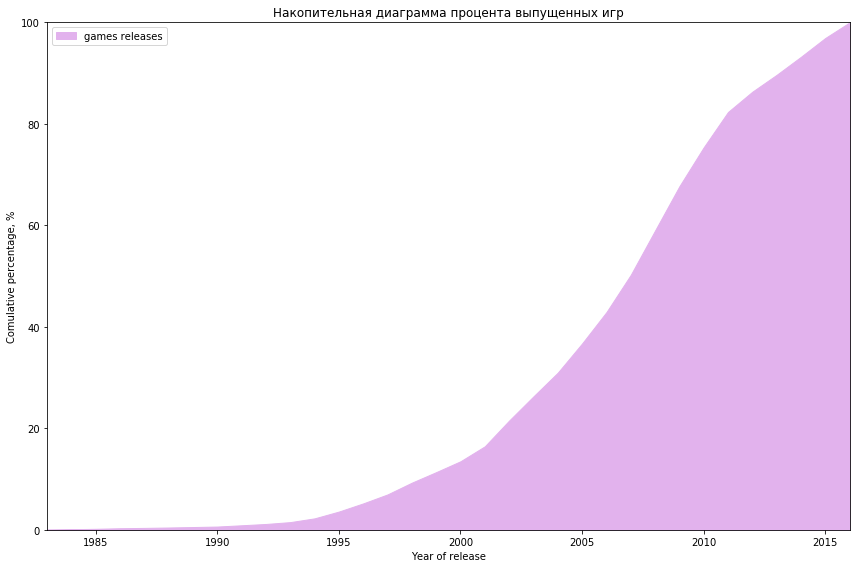

In [842]:
rnd = np.asarray(games_per_year.loc[:, 'prcnt_sum'].to_list())
yrs = np.asarray(games_per_year.loc[:, 'year_of_release'].to_list())

fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(yrs, rnd, labels=['games releases'], color='#e2b2ed')
ax.set_title('Накопительная диаграмма процента выпущенных игр')
ax.legend(loc='upper left')
ax.set_xlabel('Year of release')
ax.set_ylabel('Comulative percentage, %')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
ax.set_ylim(ymin=0, ymax=100)
fig.tight_layout()
 
plt.show();

По полученным данным хорошо видно, что за первую половину представленного периода (с 1983 по 1999 год) было выпущено порядка 11% от общего количества вышедших игр, а за вторую половину, оставшиеся 89%. Половина вышедших игр была выпущена в период с 2007 по 2016 годы. Таким образом, можно сделать вывод, что данные за 80-ые и 90-ые годы двадцатого века не имеют большого веса в количественном значении для имеющегося набора данных.

Далее рассмотрим распределение продаж по платформам. Определим модные в прошлом и популярные сейчас платформы. Оценим жизненный цикл платформ.

**Изменение продаж по платформам**

In [289]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,plt_code,genre_code,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E,1.0,1.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,58.111684,NaN,NaN,2.0,2.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,1.0,3.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E,1.0,1.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,81.058364,NaN,NaN,3.0,4.0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,75.140604,NaN,NaN,3.0,5.0,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.5,E,4.0,2.0,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.6,E,1.0,6.0,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.000000,8.4,E,1.0,2.0,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,59.925865,NaN,NaN,2.0,7.0,28.31


In [150]:
a = [1, 2, 3]
b = ['a', 'b', 'c']

c = list(zip(a, b))

print(c)

[(1, 'a'), (2, 'b'), (3, 'c')]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6bcad3190>,
      dtype=object)

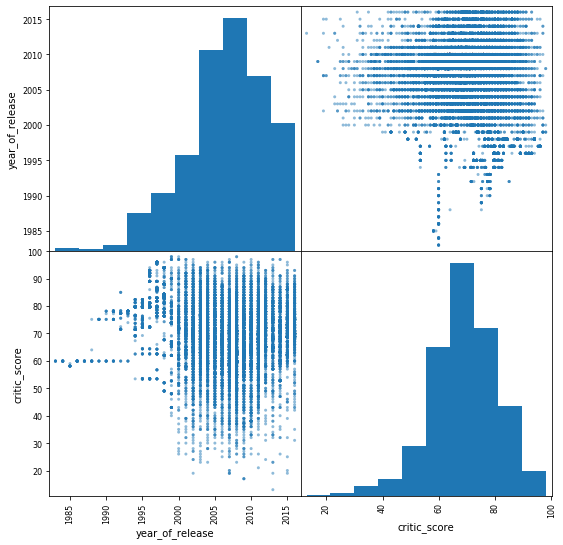

In [151]:
pd.plotting.scatter_matrix(df[['year_of_release', 'critic_score', 'user_score']], figsize=(9,9))